# How do the parameters $f$, $d$ and $N$ affect the polar pattern and effective upper frequency limit of a microphone line array?

In [1]:
####### This code will hide all the python code from this notebook ######

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Equation for the signal s(t) at each microphone n can be displayed as:

\begin{align}
x_n(t) & = a_n(\theta)s(t) + w_n(t)
\end{align}


where:

\begin{align}
a_n(\theta) = e^{-j\omega \frac{(n-1)d\sin(\theta)}{c}} 
\end{align}

and

\begin{align}
s_n(t) = A_0e^{-j(kx - \omega t)}
\end{align}

Where $A_0$ is a complex amplitude.

## Simulation

1: Define Variables

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def an(w, n, d, theta, c):
    X = np.exp((-1j) * w * (n*d*np.sin(theta)/c))
    return X

def sn(A, phi, k, x):
    S = A*np.exp(1j*phi)*np.exp(-1j*k*x)
    return S

def line_array(f, d, N, res, Sx, Sy):
    theta = np.linspace(-np.pi/2, np.pi/2, res)
    A = 1;
    phi = 0;
    w = 2*np.pi*f;
    c = 343;
    lamb = c/f;
    k = w/c;
    d_max = lamb/2;
    Mic = np.zeros((N, 2))
    for n in range(0, N):   
        Mic[n] = np.array([[0,(n-N/2)*d]])
        
    P=np.zeros((len(theta),1), dtype=complex)
    for th in range(0, len(theta)):
        p=np.zeros((N,1), dtype=complex)
        for n in range(0, N):
            Mic_x = Mic[n][0]
            Mic_y = Mic[n][1]
    
            x = np.sqrt((Sx-Mic_x)**2+(Sy-Mic_y)**2)
            s = sn(A, phi, k, x)
            a = an(w, n, d, theta[th], c)
            p[n] = s * a
            
        P[th] = np.sum(p)
        
    return [P, theta]

### 3 by 3 matrix of plots showing change in beam width given change in source frequency and change in distance d for a microphone array with number of mics N 

- I theorise that changing d is the same as changing the source frequency 
- basically prove that only one of these is worth investigating

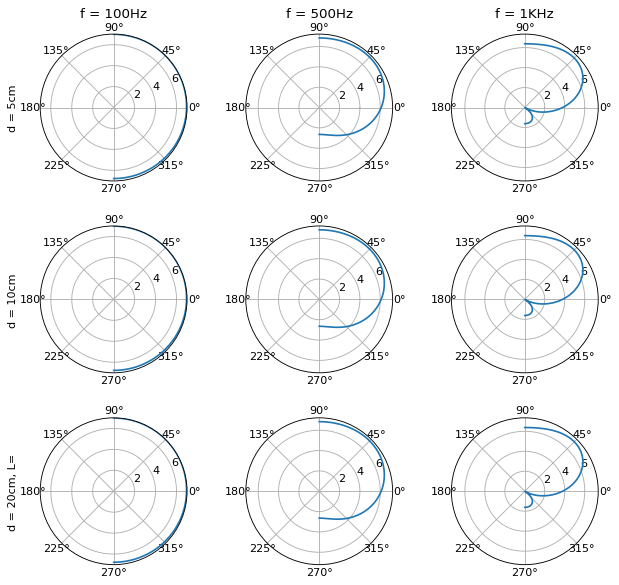

In [8]:
N = 7
res = 200
Sx = 5
Sy = 5

# d = 0.05, f = 100, 500, 1000
[OUT11, theta] = line_array(100, 0.04, N, res, Sx, Sy)
[OUT12, theta] = line_array(500, 0.04, N, res, Sx, Sy)
[OUT13, theta] = line_array(1000, 0.04, N, res, Sx, Sy)

# d = 0.1, f = 100, 500, 1000
[OUT21, theta] = line_array(100, 0.04, N, res, Sx, Sy)
[OUT22, theta] = line_array(500, 0.04, N, res, Sx, Sy)
[OUT23, theta] = line_array(1000, 0.04, N, res, Sx, Sy)

# d = 0.2, f = 100, 500, 1000
[OUT31, theta] = line_array(100, 0.04, N, res, Sx, Sy)
[OUT32, theta] = line_array(500, 0.04, N, res, Sx, Sy)
[OUT33, theta] = line_array(1000, 0.04, N, res, Sx, Sy)

nrows = 3
ncols = 3
fig=plt.figure(figsize=(9, 9), dpi= 80, facecolor='w', edgecolor='k')

## Row 1
a11 = plt.subplot(nrows, ncols, 1, projection='polar')
a11.plot(theta, np.abs(OUT11))
a11.grid(True)
a11.set_title("f = 100Hz", va='bottom')
a11.set_ylabel("d = 5cm", labelpad=20)

a12 = plt.subplot(nrows, ncols, 2, projection='polar')
a12.plot(theta, np.abs(OUT12))
a12.grid(True)
a12.set_title("f = 500Hz", va='bottom')

a13 = plt.subplot(nrows, ncols, 3, projection='polar')
a13.plot(theta, np.abs(OUT13))
a13.grid(True)
a13.set_title("f = 1KHz", va='bottom')

## Row 2
a21 = plt.subplot(nrows, ncols, 4, projection='polar')
a21.plot(theta, np.abs(OUT21))
a21.grid(True)
a21.set_ylabel("d = 10cm", labelpad=20)

a22 = plt.subplot(nrows, ncols, 5, projection='polar')
a22.plot(theta, np.abs(OUT22))
a22.grid(True)

a23 = plt.subplot(nrows, ncols, 6, projection='polar')
a23.plot(theta, np.abs(OUT23))
a23.grid(True)

# row 3
a31 = plt.subplot(nrows, ncols, 7, projection='polar')
a31.plot(theta, np.abs(OUT31))
a31.grid(True)
a31.set_ylabel("d = 20cm, L=", labelpad=20)

a32 = plt.subplot(nrows, ncols, 8, projection='polar')
a32.plot(theta, np.abs(OUT32))
a32.grid(True)

a33 = plt.subplot(nrows, ncols, 9, projection='polar')
a33.plot(theta, np.abs(OUT33))
a33.grid(True)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()

The polar patterns seen show the same phenomina occuring in changing the distance between the receivers and changing the input frequency. 

\begin{align}
a_n(\theta) = e^{-j\omega \frac{(n-1)d\sin(\theta)}{c}} 
\end{align}

Can be written as:

\begin{align}
a_n(\theta) = e^{-j 2 \pi fd n\frac{\sin(\theta)}{c}} 
\end{align}

When 0 indexed it can be seen clearly that any proportional change in frequency, distance between microphones or number of microphones will have the same effect on the beam width; meaning the system can be optimised for a target frequency range by choosing the best values for d and n. 

In the polar plot of $d = 20$cm and $f = 1$kHz there is a main lobe at 270$^\circ$. This lobe is not at the angle of interest and since the wavelength at 1kHz is 34.3cm then $d < \lambda/2$. So this phenomina can be attributed to spacial alisasing. 

http://www.personal.psu.edu/faculty/m/x/mxm14/sonar/beamforming.pdf $Gonna Keep This Here$ 

### Spacial aliasing investigation

If we make $d = \lambda$ then there will definately be spacial aliasing, so if $d = 0.1$ then the maximum frequency measurable should be $f = 1715$kHz.

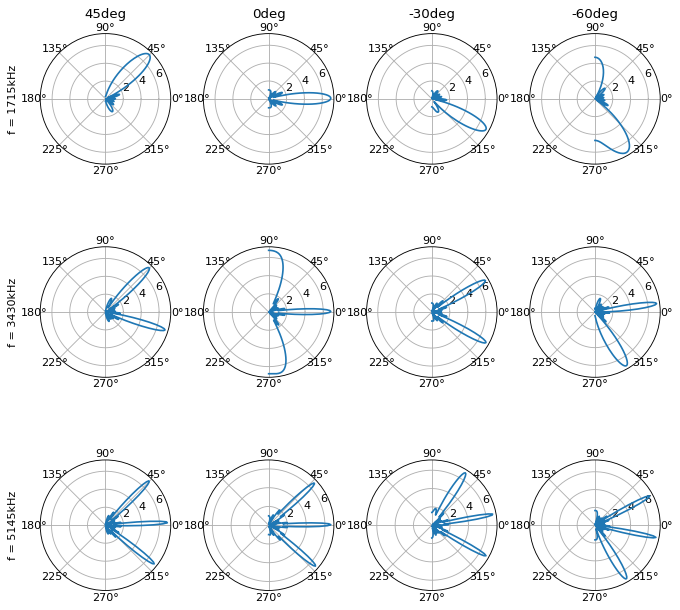

In [9]:
d = 0.1
res = 200
N = 7

XY1 = 5*np.exp(1j*45*(np.pi/180))
x1 = np.real(XY1)
y1 = np.imag(XY1)

XY2 = 5*np.exp(1j*0*(np.pi/180))
x2 = np.real(XY2)
y2 = np.imag(XY2)

XY3 = 5*np.exp(1j*(-30)*(np.pi/180))
x3 = np.real(XY3)
y3 = np.imag(XY3)

XY4 = 5*np.exp(1j*(-60)*(np.pi/180))
x4 = np.real(XY4)
y4 = np.imag(XY4)

# Row 1
f = 1715
[OUT11, theta] = line_array(f, d, N, res, x1, y1)
[OUT12, theta] = line_array(f, d, N, res, x2, y2)
[OUT13, theta] = line_array(f, d, N, res, x3, y3)
[OUT14, theta] = line_array(f, d, N, res, x4, y4)

# Row 2
f = 3430
[OUT21, theta] = line_array(f, d, N, res, x1, y1)
[OUT22, theta] = line_array(f, d, N, res, x2, y2)
[OUT23, theta] = line_array(f, d, N, res, x3, y3)
[OUT24, theta] = line_array(f, d, N, res, x4, y4)

# Row 3
f = 5145
[OUT31, theta] = line_array(f, d, N, res, x1, y1)
[OUT32, theta] = line_array(f, d, N, res, x2, y2)
[OUT33, theta] = line_array(f, d, N, res, x3, y3)
[OUT34, theta] = line_array(f, d, N, res, x4, y4)

fig1=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

nrows = 3
ncols = 4

## Row 1
a11 = plt.subplot(nrows, ncols, 1, projection='polar')
a11.plot(theta, np.abs(OUT11))
a11.grid(True)
a11.set_title("45deg", va='bottom')
a11.set_ylabel("f = 1715kHz", labelpad=20)

a12 = plt.subplot(nrows, ncols, 2, projection='polar')
a12.plot(theta, np.abs(OUT12))
a12.grid(True)
a12.set_title("0deg", va='bottom')

a13 = plt.subplot(nrows, ncols, 3, projection='polar')
a13.plot(theta, np.abs(OUT13))
a13.grid(True)
a13.set_title("-30deg", va='bottom')

a14 = plt.subplot(nrows, ncols, 4, projection='polar')
a14.plot(theta, np.abs(OUT14))
a14.grid(True)
a14.set_title("-60deg", va='bottom')

## Row 2
a21 = plt.subplot(nrows, ncols, 5, projection='polar')
a21.plot(theta, np.abs(OUT21))
a21.grid(True)
a21.set_ylabel("f = 3430kHz", labelpad=20)

a22 = plt.subplot(nrows, ncols, 6, projection='polar')
a22.plot(theta, np.abs(OUT22))
a22.grid(True)

a23 = plt.subplot(nrows, ncols, 7, projection='polar')
a23.plot(theta, np.abs(OUT23))
a23.grid(True)

a24 = plt.subplot(nrows, ncols, 8, projection='polar')
a24.plot(theta, np.abs(OUT24))
a24.grid(True)

## Row 2
a31 = plt.subplot(nrows, ncols, 9, projection='polar')
a31.plot(theta, np.abs(OUT31))
a31.grid(True)
a31.set_ylabel("f = 5145kHz", labelpad=20)

a32 = plt.subplot(nrows, ncols, 10, projection='polar')
a32.plot(theta, np.abs(OUT32))
a32.grid(True)

a33 = plt.subplot(nrows, ncols, 11, projection='polar')
a33.plot(theta, np.abs(OUT33))
a33.grid(True)

a34 = plt.subplot(nrows, ncols, 12, projection='polar')
a34.plot(theta, np.abs(OUT34))
a34.grid(True)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)
plt.show()

The above graphs show that with each multiple above the spacial nyquist limit ($\lambda/2$) an additional lobe is added to the polar plot.

## Investigating the effect of increasing the number of microphones and hence increasing array length while retaining spacial sampling rate

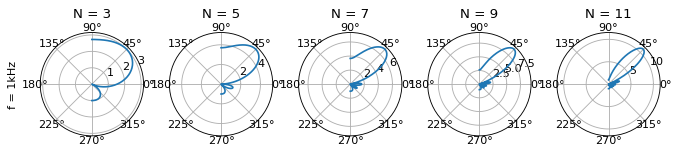

In [10]:
N = [3, 5, 7, 9, 11]
f = 1000
x = 5
y = 5
res = 200
d = 0.1

# Row 1
[OUT1, theta] = line_array(f, d, N[0], res, x, y)
[OUT2, theta] = line_array(f, d, N[1], res, x, y)
[OUT3, theta] = line_array(f, d, N[2], res, x, y)
[OUT4, theta] = line_array(f, d, N[3], res, x, y)
[OUT5, theta] = line_array(f, d, N[4], res, x, y)

fig1=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

nrows = 1
ncols = 5

## Row 1
a1 = plt.subplot(nrows, ncols, 1, projection='polar')
a1.plot(theta, np.abs(OUT1))
a1.grid(True)
a1.set_title("N = 3", va='bottom')
a1.set_ylabel("f = 1kHz", labelpad=20)

a2 = plt.subplot(nrows, ncols, 2, projection='polar')
a2.plot(theta, np.abs(OUT2))
a2.grid(True)
a2.set_title("N = 5", va='bottom')

a3 = plt.subplot(nrows, ncols, 3, projection='polar')
a3.plot(theta, np.abs(OUT3))
a3.grid(True)
a3.set_title("N = 7", va='bottom')

a4 = plt.subplot(nrows, ncols, 4, projection='polar')
a4.plot(theta, np.abs(OUT4))
a4.grid(True)
a4.set_title("N = 9", va='bottom')

a5 = plt.subplot(nrows, ncols, 5, projection='polar')
a5.plot(theta, np.abs(OUT5))
a5.grid(True)
a5.set_title("N = 11", va='bottom')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)
plt.show()

## Findings 

From the above investigation, i can state that the upper frequency limit of a linear microphone array is  $f_{max} = \frac{c}{2d}$.

Once an upper frequency limit is established, the width of the beam can be reduced by increasing the number of mics in the array. 

### Context 

The fundamental frequency $f_0$ of human speech ranges from $101$Hz for males up to $239$Hz for acting females. This information should be used to set a lower frequency limit for a speech detection system. 
(https://pdfs.semanticscholar.org/aa8b/acb5e7843740fbea24742c3046fbcc009a49.pdf 
Traunmuller, Hartmut and Eriksson, Anders: 1995)

The upper frequency limit of a system should be determined by analysis of where most of the characterising data of speech is contained within its spectrum. When using the MFCC, it can be said that this information is in the formants, which typically do not exceed $4$kHz (https://pdfs.semanticscholar.org/2ac2/92791f3146f6386208e57682ae1f45dfbae5.pdf Gelfer, Marylou Pausewang and Mikos, Victoria A: 2005)

So in designing a line array for speech detection, the frequency range of interest is $100$Hz to $4$kHz.
the lower frequency limit will be determined in desired low frequency beam width, upper frequency limit will be defined by desired spacing between microphones in order to avoid spacial aliasing. 
$$d_{max} = \frac{343}{2f_{max}}$$

In [11]:
print(343/(2 * 4000))

0.042875


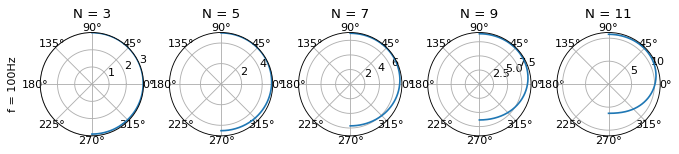

In [12]:
N = [3, 5, 7, 9, 11]
f = 100
x = 5
y = 5
res = 200
d = 0.1

# Row 1
[OUT1, theta] = line_array(f, d, N[0], res, x, y)
[OUT2, theta] = line_array(f, d, N[1], res, x, y)
[OUT3, theta] = line_array(f, d, N[2], res, x, y)
[OUT4, theta] = line_array(f, d, N[3], res, x, y)
[OUT5, theta] = line_array(f, d, N[4], res, x, y)

fig1=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

nrows = 1
ncols = 5

## Row 1
a1 = plt.subplot(nrows, ncols, 1, projection='polar')
a1.plot(theta, np.abs(OUT1))
a1.grid(True)
a1.set_title("N = 3", va='bottom')
a1.set_ylabel("f = 100Hz", labelpad=20)

a2 = plt.subplot(nrows, ncols, 2, projection='polar')
a2.plot(theta, np.abs(OUT2))
a2.grid(True)
a2.set_title("N = 5", va='bottom')

a3 = plt.subplot(nrows, ncols, 3, projection='polar')
a3.plot(theta, np.abs(OUT3))
a3.grid(True)
a3.set_title("N = 7", va='bottom')

a4 = plt.subplot(nrows, ncols, 4, projection='polar')
a4.plot(theta, np.abs(OUT4))
a4.grid(True)
a4.set_title("N = 9", va='bottom')

a5 = plt.subplot(nrows, ncols, 5, projection='polar')
a5.plot(theta, np.abs(OUT5))
a5.grid(True)
a5.set_title("N = 11", va='bottom')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)
plt.show()

In [13]:
OUT = OUT5
n = 0
for OUT in [OUT1, OUT2, OUT3, OUT4, OUT5]:
    n += 1
    maxout = max(np.abs(OUT))
    i = 0
    for out in np.abs(OUT):
        if out == maxout:
            break 
        i += 1
    
    maxAngle = theta[i] * (180/np.pi)
    print('maximum angle', n,':')
    print(maxAngle)

maximum angle 1 :
45.678391959798994
maximum angle 2 :
45.678391959798994
maximum angle 3 :
45.678391959798994
maximum angle 4 :
45.678391959798994
maximum angle 5 :
45.678391959798994


Though the maximum value is consistently measurable in simulation, the tolerance of a wide beamwidth would cause problems in reality, therefore both angle and beamwidth must be evaluated together. 

# The effect of averaging beams over frequency ranges to approximate broadband response

In order to average for broadband, or even for a range of filtered input frequencies, beam width must be averaged over multiple frequencies. Such that beam width $B(f)$ for a given array as a function of frequency $f$ can be averaged such that:
$$
BeamWidth = \frac{1}{f_{max}-f_{min}}\int_{f_{min}}^{f_{max}}B(f)df
$$

Which should really be expresed as an average, a maxium and a minimum. To account for width at low frequency and over 'spikiness' at high frequency

### 1. Redefine Functions

In [14]:
def generate_random_array(N, L):        
    X_POS = [(L * r.random()) - L/2 for _ in range(N)]
    Y_POS = np.zeros(len(X_POS))
    MIC_ARRAY = [Y_POS, X_POS]
    Mic = [[MIC_ARRAY[j][i] for j in range(len(MIC_ARRAY))] for i in range(len(MIC_ARRAY[0]))]
    return MIC_ARRAY, Mic

def generate_linear_array(N, L):
    X_POS = [(L * n/N) - L/2 for n in range(N)]
    Y_POS = np.zeros(len(X_POS))
    MIC_ARRAY = [Y_POS, X_POS]
    Mic = [[MIC_ARRAY[j][i] for j in range(len(MIC_ARRAY))] for i in range(len(MIC_ARRAY[0]))]
    return MIC_ARRAY, Mic

def generate_line_array_spacing(d, N):
    X_POS = [((n - N/2) * d) for n in range(N)]
    Y_POS = np.zeros(len(X_POS))
    MIC_ARRAY = [Y_POS, X_POS]
    Mic = [[MIC_ARRAY[j][i] for j in range(len(MIC_ARRAY))] for i in range(len(MIC_ARRAY[0]))]
    return MIC_ARRAY, Mic
    

def an(w, n, MIC_ARRAY, theta, c):
    X = np.exp((-1j) * w * (MIC_ARRAY[1][n]*np.sin(theta)/c))
    return X

def sn(A, phi, k, x):
    S = A*np.exp(1j*phi)*np.exp(-1j*k*x)
    return S

def line_array(f, MIC_ARRAY, Mic, N, res, Sx, Sy):
    theta = np.linspace(-np.pi/2, np.pi/2, res)
    A = 1;
    phi = 0;
    w = 2*np.pi*f;
    c = 343;
    lamb = c/f;
    k = w/c;
    d_max = lamb/2;
        
    P=np.zeros((len(theta),1), dtype=complex)
    for th in range(0, len(theta)):
        p=np.zeros((N,1), dtype=complex)
        for n in range(0, N):
            Mic_x = Mic[n][0]
            Mic_y = Mic[n][1]
    
            x = np.sqrt((Sx-Mic_x)**2+(Sy-Mic_y)**2)
            s = sn(A, phi, k, x)
            a = an(w, n, MIC_ARRAY, theta[th], c)
            p[n] = s * a
            
        P[th] = np.sum(p)
        
    return [P, theta]

def minus3db(P):
    maxP = max(abs(P))
    maxP_sqrt2 = maxP/np.sqrt(2)
    return maxP_sqrt2

def find_width(theta, P): 
    maxP_sqrt2 = minus3db(abs(P))
    
    i = 0
    # Here is the bit that finds the index of the array
    index = []
    new_peak = []
    index_flag = 0
    for p in abs(P):
        if p > maxP_sqrt2:
            index.append(i)
            new_peak.append(p)

        i += 1
    beam_th = theta[index]

    BEAM_WIDTH = np.max(beam_th) - np.min(beam_th)
    return BEAM_WIDTH

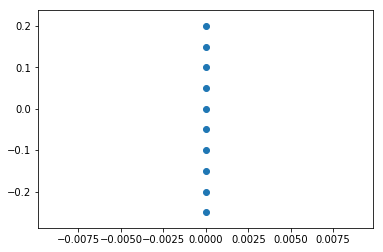

In [15]:
import random as r

L = 1
N = 10
MIC_ARRAY, Mic = generate_line_array_spacing(0.05, N)
plt.scatter(MIC_ARRAY[0], MIC_ARRAY[1])
plt.show()

------------------------------------------------
Filtering Mics According to Frequency

Minimum (deg c)
65.12562814070353
Maximum (deg c)
85.0251256281407
Average (deg c)
71.18592964824118
Max Array Length (m)
0.24
------------------------------------------------
Using all mics regardless of frequency

Minimum (deg c)
27.135678391959804
Maximum (deg c)
85.0251256281407
Average (deg c)
52.582914572864325
Max Array Length (m)
0.24


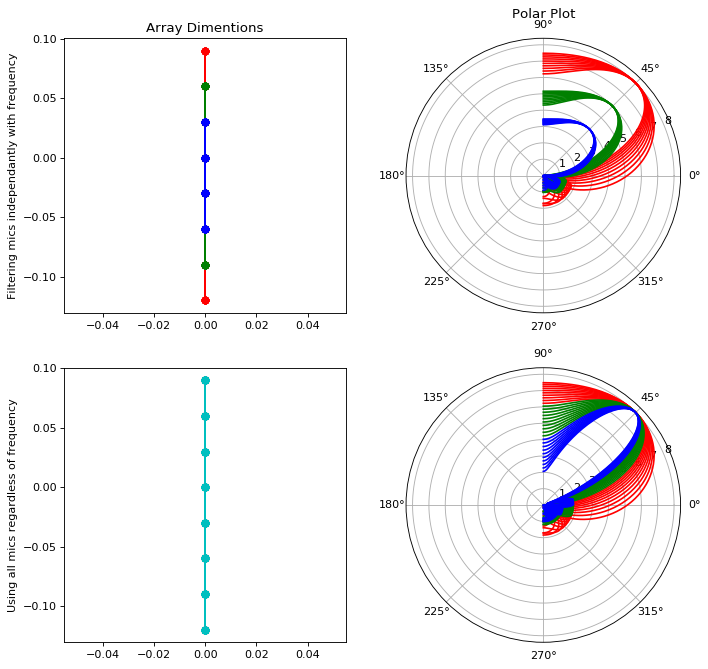

In [16]:
import math
f_min = 1000
f_max = 4000
N = 8
L = 0.3
d = 0.03
Length_max = N * d
res = 200
Sx = 1
Sy = 1
step = 100
BEAM_WIDTH = []
P_all = []
colours = ['r', 'g', 'b', 'c']
F_cutoff = []

i = 0
fig=plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
fig1 = plt.subplot(2, 2, 2, projection='polar')
fig2 = plt.subplot(2, 2, 1)
N_original = N
N = N + 2
for f in range(f_min, f_max, step):
    if f%1000 == 0:
        N = N - 2
        colour = colours[i]
        i += 1
        F_cutoff.append(f)
    MIC_ARRAY, Mic = generate_line_array_spacing(d, N)
    P, theta = line_array(f, MIC_ARRAY, Mic, N, res, Sx, Sy)
    beam_width = find_width(theta, P)
    BEAM_WIDTH.append(beam_width)
    P_all.append(P)
    fig1.plot(theta, abs(P), colour)
    fig2.plot(MIC_ARRAY[0], MIC_ARRAY[1], colour, marker='o')

print('------------------------------------------------')    
print('Filtering Mics According to Frequency')
print('')
print('Minimum (deg c)')
print(math.degrees(min(BEAM_WIDTH)))
print('Maximum (deg c)')
print(math.degrees(max(BEAM_WIDTH)))
print('Average (deg c)')
print(math.degrees(np.mean(BEAM_WIDTH)))
print('Max Array Length (m)')
print(Length_max)
    
BEAM_WIDTH = []
N = N_original
i = 0
fig3 = plt.subplot(2, 2, 4, projection='polar')
fig4 = plt.subplot(2, 2, 3)
for f in range(f_min, f_max, step):
    if f%1000 == 0:
        N = N
        colour = colours[i]
        i += 1
        F_cutoff.append(f)
    MIC_ARRAY, Mic = generate_line_array_spacing(d, N)
    
    P, theta = line_array(f, MIC_ARRAY, Mic, N, res, Sx, Sy)
    beam_width = find_width(theta, P)
    BEAM_WIDTH.append(beam_width)
    P_all.append(P)
    fig3.plot(theta, abs(P), colour)
    fig4.plot(MIC_ARRAY[0], MIC_ARRAY[1], 'c', marker='o')
    
print('------------------------------------------------')
print('Using all mics regardless of frequency')
print('')
print('Minimum (deg c)')
print(math.degrees(min(BEAM_WIDTH)))
print('Maximum (deg c)')
print(math.degrees(max(BEAM_WIDTH)))
print('Average (deg c)')
print(math.degrees(np.mean(BEAM_WIDTH)))
print('Max Array Length (m)')
print(Length_max)

fig1.title.set_text('Polar Plot')
fig2.set_ylabel('Filtering mics independantly with frequency')
fig2.title.set_text('Array Dimentions')
fig4.set_ylabel('Using all mics regardless of frequency')
plt.show()

fname = ''
plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

All mics 1kHz - 2kHz, Green and Blue mics 2kHz - 3kHz, Blue mics 3kHz - 4kHz

The effect of changing the length of the mic array depending on frequency content allows for a more uniform beam width at high frequency, with the tradeoff of reducing gain at higher frequencies by a dB percentage as a ratio of used mics against mics taken away. 

What can also be seen by changing the angle of the incoming sound wave is that the apature changes with this angle, increasing as the angle gets closer to the $180^\circ$ mark. Given the size of this array, 30cm, this can be considered a resonable trade off. 

## Notes

Frequency dependent normalisation

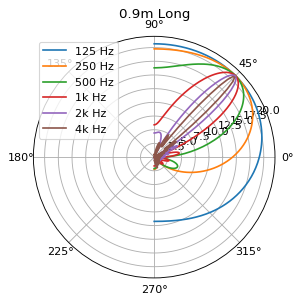

In [18]:
L = 0.9
N = 21
d = 0.04
res = 200
Sx = 5
Sy = 5
MIC_ARRAY, Mic = generate_linear_array(N, L)

fig1=plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')

nrows = 1
ncols = 1

## Row 1
a1 = plt.subplot(nrows, ncols, 1, projection='polar')

f = 125
OUT, theta = line_array(f, MIC_ARRAY, Mic, N, res, Sx, Sy)
a1.plot(theta, np.abs(OUT))

f = 250
OUT, theta = line_array(f, MIC_ARRAY, Mic, N, res, Sx, Sy)
a1.plot(theta, np.abs(OUT))

f = 500
OUT, theta = line_array(f, MIC_ARRAY, Mic, N, res, Sx, Sy)
a1.plot(theta, np.abs(OUT))

f = 1000
OUT, theta = line_array(f, MIC_ARRAY, Mic, N, res, Sx, Sy)
a1.plot(theta, np.abs(OUT))

f = 2000
OUT, theta = line_array(f, MIC_ARRAY, Mic, N, res, Sx, Sy)
a1.plot(theta, np.abs(OUT))

f = 4000
OUT, theta = line_array(f, MIC_ARRAY, Mic, N, res, Sx, Sy)
a1.plot(theta, np.abs(OUT))

a1.grid(True)
Title = str(L) + "m Long"
a1.set_title(Title)
a1.legend(['125 Hz', '250 Hz', '500 Hz', '1k Hz', '2k Hz', '4k Hz'])

#plt.savefig(Title + '.png', dpi=700)
plt.show()